In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mission_launches.csv', parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [5]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [6]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], inplace=True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [8]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
print(f'Any NaN values? {df.isna().values.any()}')

Any NaN values? True


In [10]:
print(f'Any duplicates? {df.duplicated().values.any()}')

Any duplicates? True


In [11]:
print(f'Any NaN values? {df.isna().values.any()}')

Any NaN values? True


In [12]:
df.Price = df.Price.astype(str).str.replace('NaN', '0')
df.Price = df.Price.astype(str).str.replace('nan', '0')
df.Price = df.Price.astype(str).str.replace(',', '')
df.Price = pd.to_numeric(df.Price)
print(f'Any NaN values? {df.isna().values.any()}')

Any NaN values? False


In [13]:
df.Date = df.Date.astype(str).str.replace(' UTC', '')
df.Date = pd.to_datetime(df.Date)

In [14]:
df.insert(0, 'Year', df.Date.dt.year)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            4324 non-null   int64         
 1   Organisation    4324 non-null   object        
 2   Location        4324 non-null   object        
 3   Date            4324 non-null   datetime64[ns]
 4   Detail          4324 non-null   object        
 5   Rocket_Status   4324 non-null   object        
 6   Price           4324 non-null   float64       
 7   Mission_Status  4324 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 270.4+ KB


In [16]:
df.head()

,Year,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,2020,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,2020,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2020,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,2020,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,2020,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [17]:
missions_per_year = df.groupby(['Year', 'Organisation']).agg({'Organisation': pd.Series.count})
missions_per_year.rename(columns={'Organisation': 'No. of Missions'}, inplace=True)

In [18]:
missions_per_year.sort_values(by=['Year', 'No. of Missions'], ascending=False, inplace=True)
mod_missions_per_year = missions_per_year.reset_index()

In [19]:
missions_per_year.head()

No. of Missions
Year Organisation                 
2020 CASC                       19
     SpaceX                     14
     Arianespace                 4
     Roscosmos                   4
     ULA                         4

In [20]:
df_most_missions_per_year = pd.DataFrame(columns={'Organisation', 'No. of Missions'}, index=list(set(df.Year)))

In [21]:
mod_missions_per_year.tail(20)

,Year,Organisation,No. of Missions
643,1961,US Air Force,23
644,1961,NASA,12
645,1961,RVSN USSR,9
646,1961,General Dynamics,8
647,1960,US Air Force,21
648,1960,RVSN USSR,9
649,1960,General Dynamics,5
650,1960,NASA,4
651,1959,US Air Force,10
652,1959,RVSN USSR,4


In [22]:
years_list = []
org_list = []
no_missions_list = []
for i in range(len(mod_missions_per_year)):
    if mod_missions_per_year.Year[i] not in years_list:
        years_list.append(mod_missions_per_year.Year[i])
        org_list.append(mod_missions_per_year.Organisation[i])
        no_missions_list.append(mod_missions_per_year['No. of Missions'][i])
most_missions_per_year = pd.DataFrame(index=years_list)
most_missions_per_year.insert(0, 'Organisation', org_list)
most_missions_per_year.insert(1, 'No. of Missions', no_missions_list)

In [23]:
most_missions_per_year

,Organisation,No. of Missions
2020,CASC,19
2019,CASC,27
2018,CASC,37
2017,SpaceX,18
2016,CASC,22
...,...,...
1961,US Air Force,23
1960,US Air Force,21
1959,US Air Force,10
1958,US Navy,12


In [24]:
df.tail()

,Year,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,1958,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,0.0,Failure
4320,1958,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,0.0,Success
4321,1957,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,0.0,Failure
4322,1957,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,0.0,Success
4323,1957,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,0.0,Success


In [25]:
price_per_year = df.groupby(['Year']).agg({'Price': pd.Series.sum})

In [26]:
price_per_year.tail()

,Price
Year,
2016,5085.27
2017,4586.41
2018,5697.98
2019,4351.51
2020,2945.81


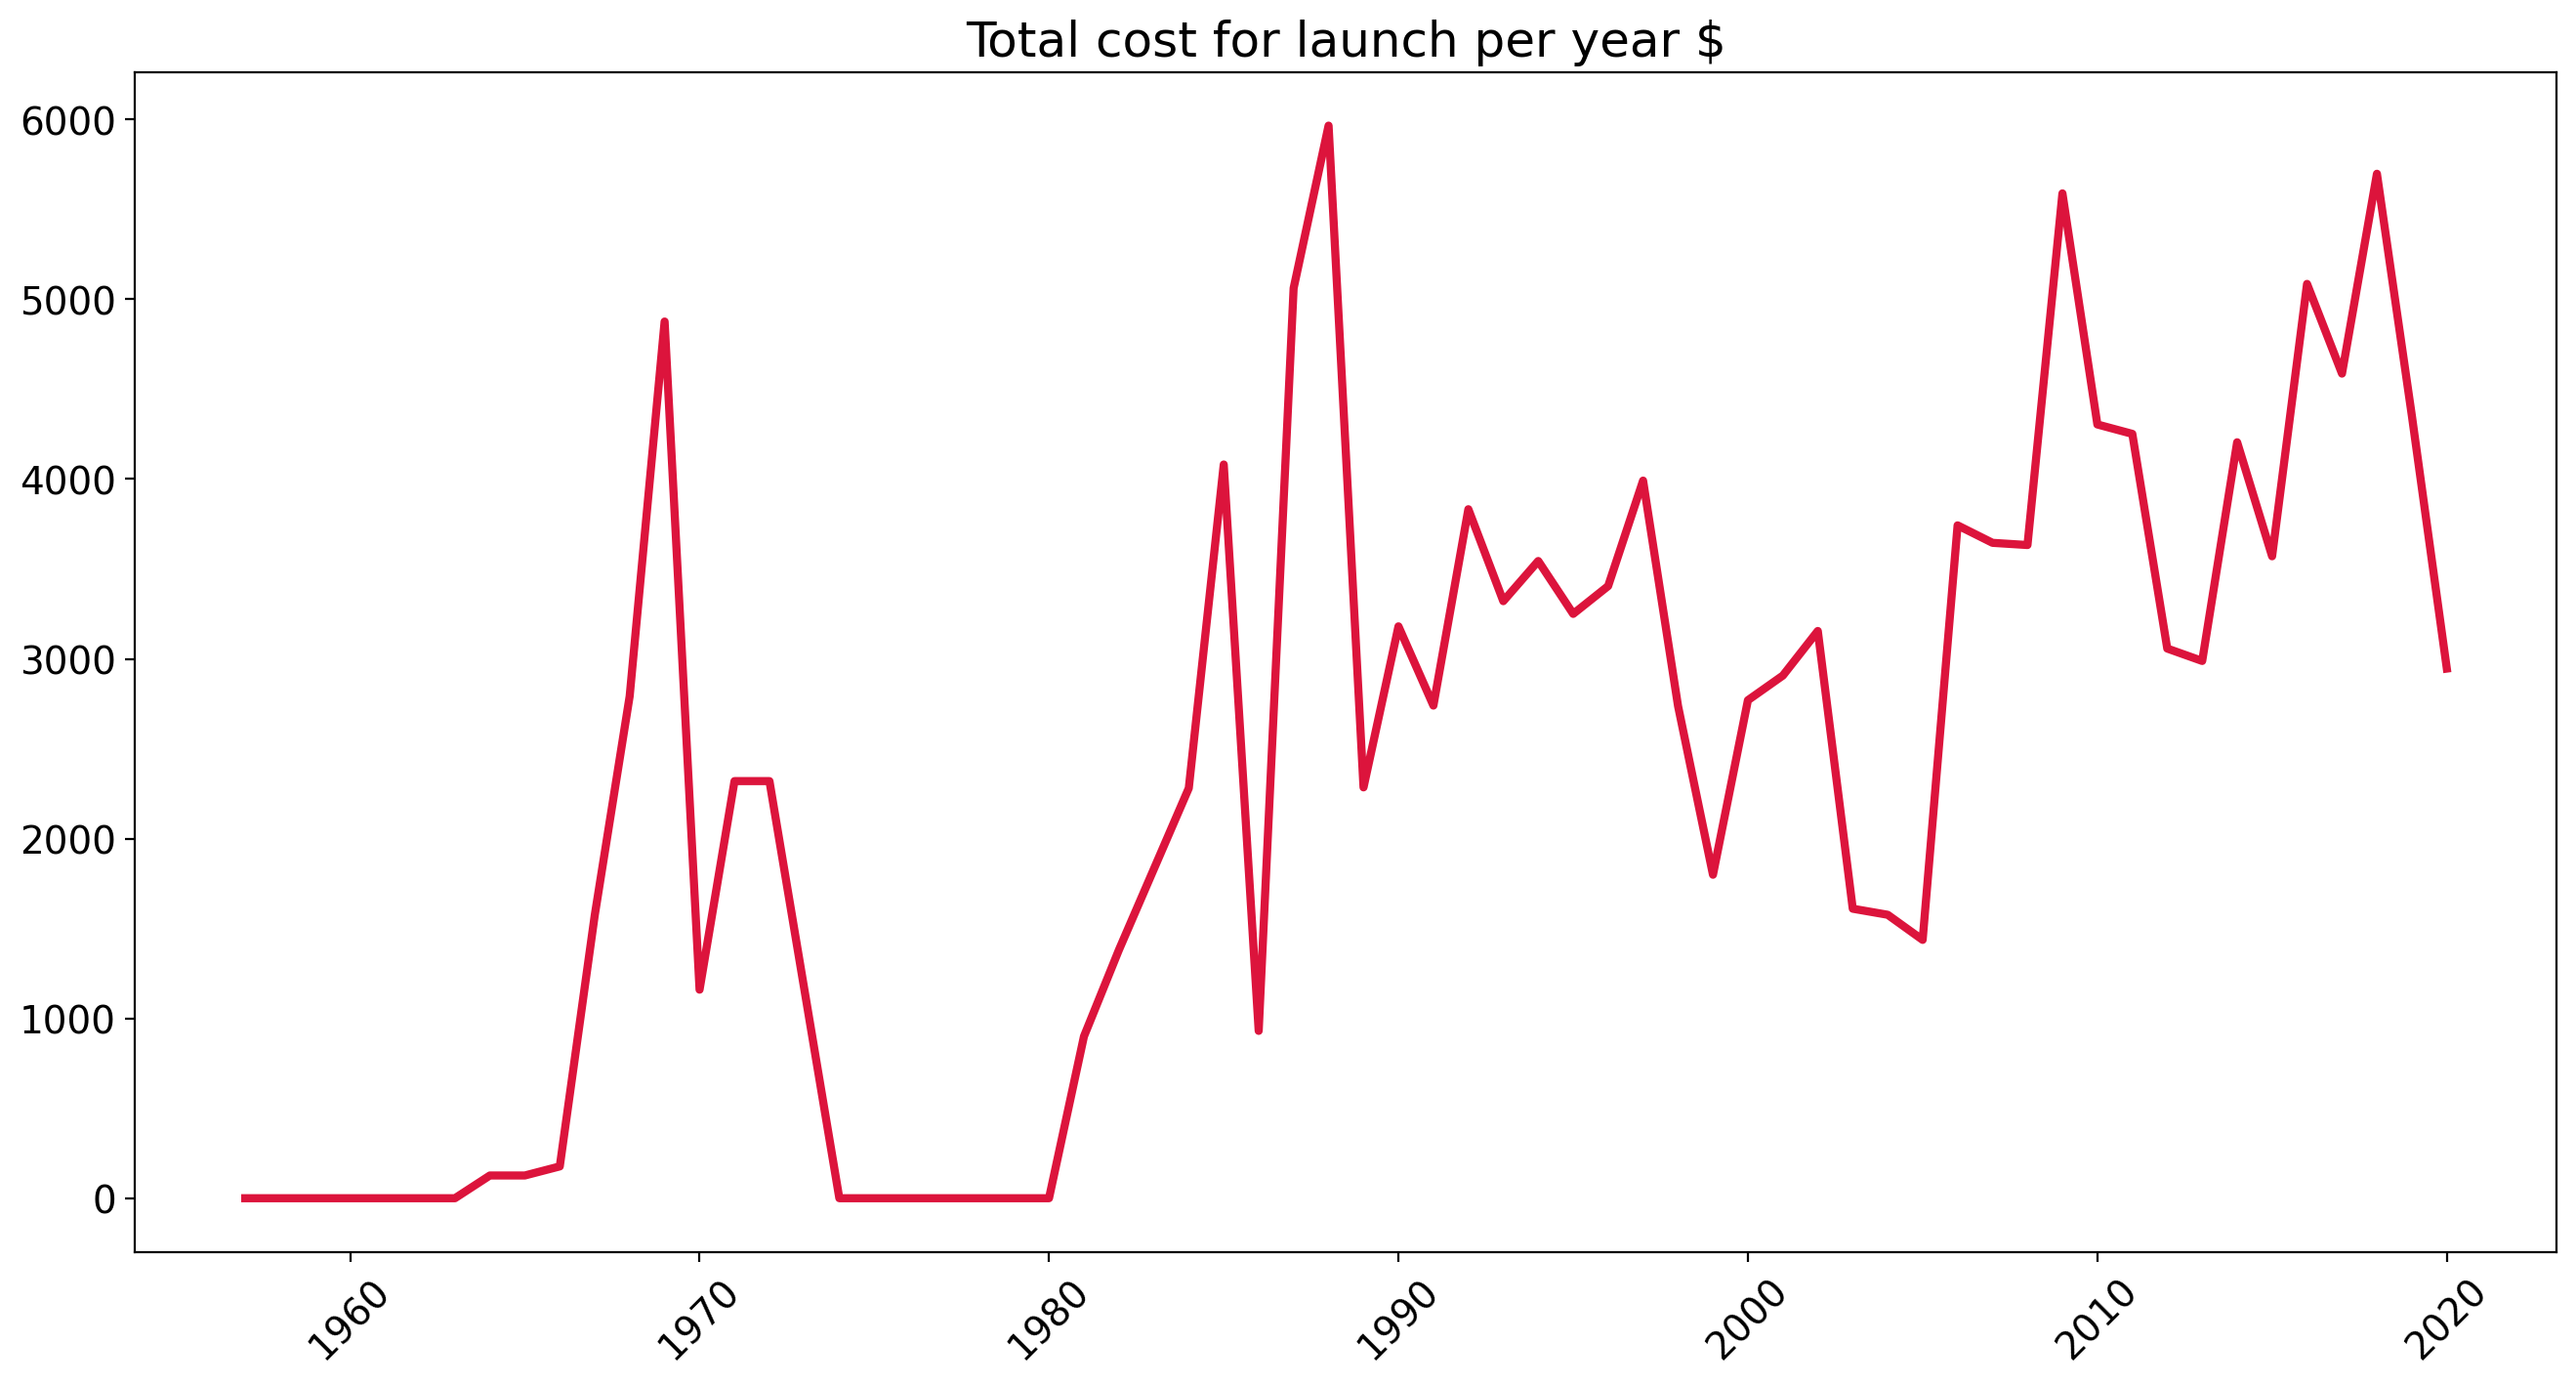

In [27]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Total cost for launch per year $', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.plot(price_per_year.index, price_per_year.values, c='crimson', linewidth=3)
 
plt.show()

In [28]:
df.head()

,Year,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,2020,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,2020,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2020,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,2020,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,2020,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [29]:
df.insert(2, 'Month', df.Date.dt.month)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Year            4324 non-null   int64         
 1   Organisation    4324 non-null   object        
 2   Month           4324 non-null   int64         
 3   Location        4324 non-null   object        
 4   Date            4324 non-null   datetime64[ns]
 5   Detail          4324 non-null   object        
 6   Rocket_Status   4324 non-null   object        
 7   Price           4324 non-null   float64       
 8   Mission_Status  4324 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 304.2+ KB


In [31]:
df.Month.value_counts().head(5)

12    450
6     402
4     383
10    381
8     373
Name: Month, dtype: int64

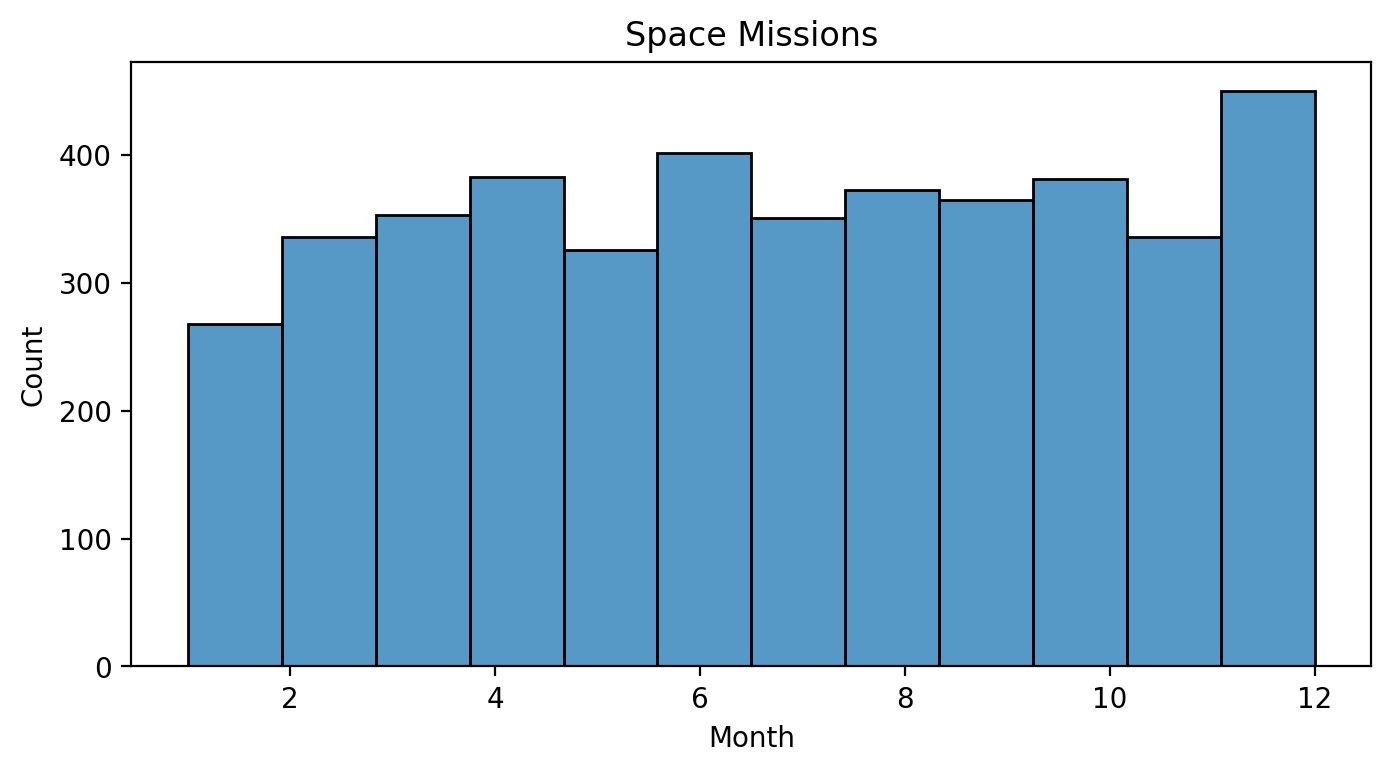

In [32]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df,
             x=df.Month,
             bins=12)
plt.xlabel('Month')
plt.title('Space Missions')
plt.show()

In [33]:
df.head()

,Year,Organisation,Month,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,2020,SpaceX,8,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,2020,CASC,8,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2020,SpaceX,8,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,2020,Roscosmos,7,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,2020,ULA,7,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [34]:
df.Mission_Status.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [35]:
modified_df = df.query('Mission_Status == "Success" or Mission_Status == "Failure"')

In [36]:
modified_df.head()

,Year,Organisation,Month,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,2020,SpaceX,8,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,2020,CASC,8,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2020,SpaceX,8,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,2020,Roscosmos,7,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,2020,ULA,7,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [37]:
modified_df.Mission_Status.value_counts()

Success    3879
Failure     339
Name: Mission_Status, dtype: int64

In [38]:
status_over_years = modified_df.groupby(['Year', 'Mission_Status']).agg({'Mission_Status': pd.Series.count})
status_over_years.rename(columns={'Mission_Status': 'Count'}, inplace=True)

In [39]:
status_over_years.head(20)

Count
Year Mission_Status       
1957 Failure             1
     Success             2
1958 Failure            20
     Success             6
1959 Failure             9
     Success             8
1960 Failure            20
     Success            19
1961 Failure            17
     Success            32
1962 Failure            15
     Success            65
1963 Failure            12
     Success            29
1964 Failure            10
     Success            48
1965 Failure            11
     Success            74
1966 Failure            10
     Success            81

<AxesSubplot:xlabel='Year'>

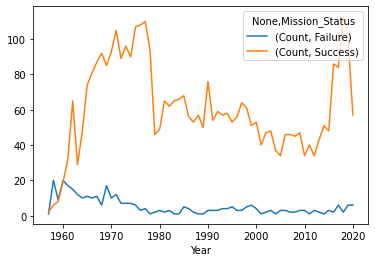

In [40]:
status_over_years.unstack().plot()